## RF linac example



In [1]:
from abel import *
import numpy as np
#%load_ext autoreload
#%autoreload 2

## Define the linac and beams

In [2]:
# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C] bunch charge (not train)
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.02
source.bunch_length = 18e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = 1
source.beta_y = source.beta_x
source.num_particles = 5000
source.num_bunches_in_train = 312
source.bunch_separation = 0.5e-9

beam = source.track()
print(beam.train_duration())
print(-beam.average_current_train())

1.555e-07
3.2043532679999993


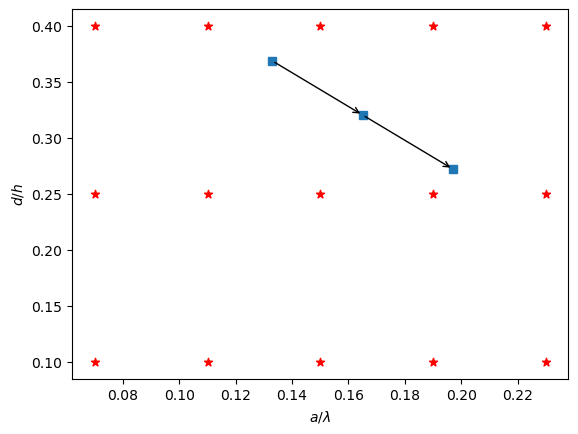

In [3]:
#Examples of RFAccelerators

#Multi structure linacs

#driverLinac = RFAccelerator_TW_CLICG()

driverLinac = RFAccelerator_TW_DB2()

#Set some linac parameters
driverLinac.length = 500
driverLinac.num_structures = 2500

#Set some common structure parameters
driverLinac.rf_frequency = 6.0e9
driverLinac.num_rf_cells = 50

#Set some specialized structure parameters
driverLinac.a_n *= 1.5
driverLinac.a_n_delta *= 2

driverLinac.d_n *= 2.0
driverLinac.d_n_delta *= -1.2

driverLinac.plot_database_points()

#Switch this function off, I will do it manually at the end
driverLinac.autoOptimize = False

#driverLinac = RFAccelerator_TW_CLICG(num_rf_cells=100, f0_scaleto=6.0, length=500,num_structures=100, gradient=100e6, beam_pulse_length=100e-9, beam_current=1)


#Single structure "linac"
#driverLinac = RFAccelerator_TW_CLICG(num_rf_cells=24, f0_scaleto=3.0, length=None, num_structures=1, gradient=100e6, beam_pulse_length=100e-9, beam_current=550)
#driverLinac = RFAccelerator_TW_CLIC502(num_rf_cells=25, f0_scaleto=3.0, length=None, num_structures=1, gradient=100e6, beam_pulse_length=100e-9, beam_current=1)




In [4]:

#Geometry only
print("Linac fill factor =", driverLinac.fill_factor)
print("Structure filling time = ", driverLinac.get_t_fill()*1e9, "[ns]")


Linac fill factor = 4.1637859171189415
Structure filling time =  92.29540331715612 [ns]


In [5]:
#Basic gradient/voltage information
driverLinac.gradient_structure = 100e6 #It will figure out the voltages from the geometry
print("Total voltage =", driverLinac.voltage_total/1e9, "[GV], per structure =", \
      driverLinac.voltage_structure/1e6, "[MV]")


Total voltage = 208.18929585594705 [GV], per structure = 83.27571834237882 [MV]


In [6]:
driverLinac.num_bunches_in_train = 1
print("Power per structure =", driverLinac.get_structure_power()/1e6, "[MW]")
#driverLinac.bunch_separation = 6/12e9 #6 buckets at 12 GHz
print("Beam Pulse Length =", driverLinac.train_duration, "[ns]")
driverLinac.bunch_charge = 1e-9 #[C]
print("Total RF->beam Efficiency =", driverLinac.get_RF_efficiency()*100, "[%] (single bunch)")
print("Energy per structure =", driverLinac.get_structure_pulse_energy(), "[J]")
print("Max pulse length =", driverLinac.get_pulse_length_max()*1e9, "[ns] (beam current undefined)")
driverLinac.bunch_charge = 1e-9 #[C]
driverLinac.num_bunches_in_train = 2
driverLinac.bunch_separation = 6/12e9 #6 buckets at 12 GHz
print("Max pulse length =", driverLinac.get_pulse_length_max()*1e9, "[ns] @ beam_current=",driverLinac.average_current_train, "[A]")

Power per structure = 560.692099069643 [MW]
Beam Pulse Length = 0.0 [ns]
Total RF->beam Efficiency = 0.14336046150340204 [%] (single bunch)
Energy per structure = 58.088344212258725 [J]
Max pulse length = 0.0 [ns] (beam current undefined)
Max pulse length = 13.524561006145449 [ns] @ beam_current= 1.9999999999999998 [A]


## Let's do some tracking - this changes the beam settings in the driverLinac object!

Beam parameters in linac before tracking:
RF accelerator: Length=500.0[m], L_struct=833[mm], N=2500, fill=416.379[%], Egain=208.189 [GV], gradient_structure=100.0[MV/m], rf_frequency=6.000000000000001[GHz], bunch_charge=1e-09[C], bunch_separation=5e-10[s], num_bunches_in_train=2


Beam parameters in linac after tracking:
RF accelerator: Length=500.0[m], L_struct=833[mm], N=2500, fill=416.379[%], Egain=208.189 [GV], gradient_structure=100.0[MV/m], rf_frequency=6.000000000000001[GHz], bunch_charge=1.6021766339999998e-09[C], bunch_separation=5e-10[s], num_bunches_in_train=312


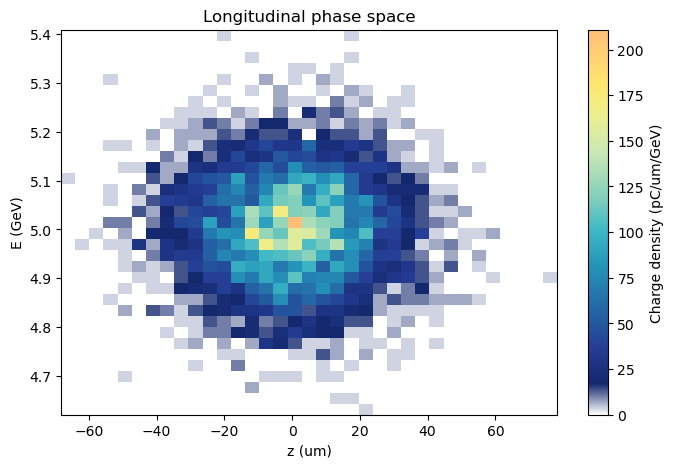

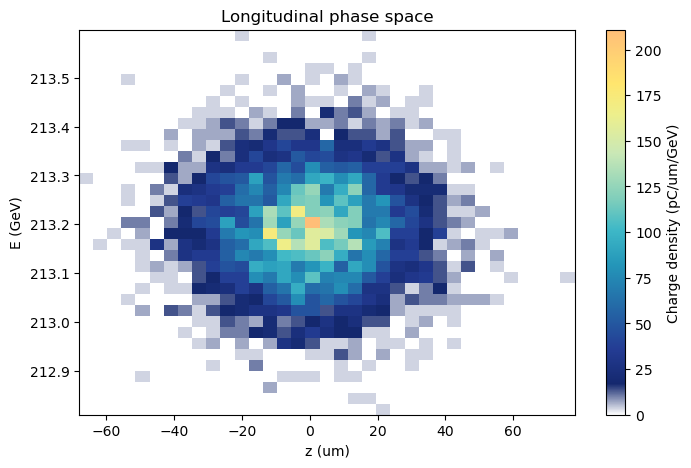

In [7]:
beam.plot_lps()

print("Beam parameters in linac before tracking:",)
print(driverLinac)

beam2 = driverLinac.track(beam)
beam2.plot_lps()

print("Beam parameters in linac after tracking:",)
print(driverLinac)


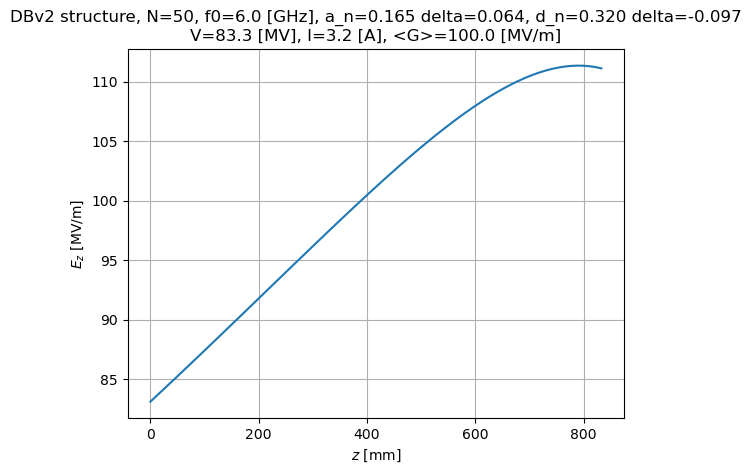

In [8]:
driverLinac.plot_gradient_profile()
plt.grid()

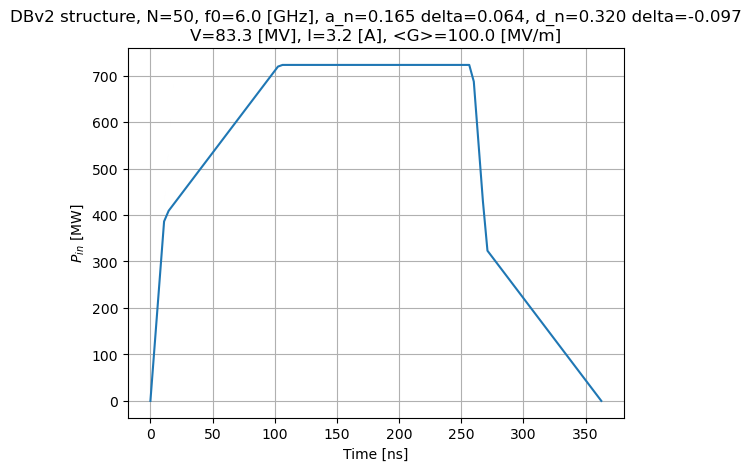

In [9]:
driverLinac.plot_power_profile()
plt.grid()


## Gradient optimalization

We have now set the pulse length (from the train) and the total energy we want. What are the gradient we can achieve, and how long does the linac need to be?

In [10]:
print(f"Max gradient at I_beam={driverLinac.average_current_train:.1f}[A], t_beam={driverLinac.train_duration*1e9:.1f}[ns]")
print(driverLinac)

#driverLinac._RF_structure.uselimit_PC = False

print("Current structure voltage  =", driverLinac.voltage_structure/1e6, "[MV] ->", driverLinac.gradient_structure/1e6, ", [MV/m] -> power/structure=", driverLinac.get_structure_power()/1e6, "[MW]")
print("Max structure voltage      =", driverLinac.get_structure_voltage_max()/1e6, "[MV]") #Max gradient at current pulse length and current
print("Max structure gradient     =", driverLinac.get_structure_voltage_max()/1e6/driverLinac.structure_length, "[MV/m]")
print("Max pulse length =", driverLinac.get_pulse_length_max()*1e9, "[ns]") #Max pulse length at current gradient and current
print( driverLinac._RF_structure.getMaxAllowableBeamTime_detailed(driverLinac.get_structure_power(), driverLinac.average_current_train))

Max gradient at I_beam=3.2[A], t_beam=155.5[ns]
RF accelerator: Length=500.0[m], L_struct=833[mm], N=2500, fill=416.379[%], Egain=208.189 [GV], gradient_structure=100.0[MV/m], rf_frequency=6.000000000000001[GHz], bunch_charge=1.6021766339999998e-09[C], bunch_separation=5e-10[s], num_bunches_in_train=312
Current structure voltage  = 83.27571834237882 [MV] -> 100.0 , [MV/m] -> power/structure= 722.8302014708548 [MW]
Max structure voltage      = 64.21401658244487 [MV]
Max structure gradient     = 77.11013229382917 [MV/m]
Max pulse length = 14.08926934742479 [ns]
power=722.83[MW], beamCurrent_pulseShape=3.20435[A], beamCurrent_loading=3.20435[A], powerFraction=0.85, wastedTime=33.8166[ns], maxFields={maxEs=197.937[MV/m]@idx=621, maxHs=525.668[kA/m]@idx=922, maxSc=6.44081[W/um^2]@idx=0, maxPC=11.685[MW/mm]@idx=0}, time_E=343.237[ns], time_Sc=14.0893[ns], time_dT=265.333[ns], time_PC=-32.2914[ns], time=14.0893[ns], which='S'


In [11]:

print("Fixing gradient and linac geometry")
print("optimizing...:", driverLinac.optimize_linac_geometry_and_gradient())
print(driverLinac)
print("Current structure voltage  =", driverLinac.voltage_structure/1e6, "[MV] ->", driverLinac.gradient_structure/1e6, ", [MV/m] -> power/structure=", driverLinac.get_structure_power()/1e6, "[MW]")
print("Max structure voltage      =", driverLinac.get_structure_voltage_max()/1e6, "[MV/m]") #Max gradient at current pulse length and current
print("Max structure gradient     =", driverLinac.get_structure_voltage_max()/1e6/driverLinac.structure_length, "[MV/m]")
print("Max pulse length           =", driverLinac.get_pulse_length_max()*1e9, "[ns]") #Max pulse length at current gradient and current
print( driverLinac._RF_structure.getMaxAllowableBeamTime_detailed(driverLinac.get_structure_power(), driverLinac.average_current_train)) 

Fixing gradient and linac geometry
optimizing...: (64214016.58244488, 64196514.29415574, 3243)
RF accelerator: Length=2700.6[m], L_struct=833[mm], N=3243, fill=100.000[%], Egain=208.189 [GV], gradient_structure=77.1[MV/m], rf_frequency=6.000000000000001[GHz], bunch_charge=1.6021766339999998e-09[C], bunch_separation=5e-10[s], num_bunches_in_train=312
Current structure voltage  = 64.19651429415573 [MV] -> 77.08911501695961 , [MV/m] -> power/structure= 460.55080577762834 [MW]
Max structure voltage      = 64.21401658244487 [MV/m]
Max structure gradient     = 77.11013229382917 [MV/m]
Max pulse length           = 156.01089825014503 [ns]
power=460.551[MW], beamCurrent_pulseShape=3.20435[A], beamCurrent_loading=3.20435[A], powerFraction=0.85, wastedTime=29.1992[ns], maxFields={maxEs=153.321[MV/m]@idx=448, maxHs=392.48[kA/m]@idx=803, maxSc=4.10376[W/um^2]@idx=0, maxPC=7.44511[MW/mm]@idx=0}, time_E=1716.47[ns], time_Sc=156.011[ns], time_dT=1022.33[ns], time_PC=-23.3026[ns], time=156.011[ns], whi

# Exercising the RFAcceleratorBasic a bit

In [12]:
basic = RFAcceleratorBasic(nom_energy_gain=1e9)
basic.num_structures = 100
basic.length=basic.num_structures*basic.structure_length/basic.autoOptimize_targetFillFactor
basic.track(beam,verbose=1)


    ... #2  RFAcceleratorBasic      (s =  570.4 m) :   E = 214.2 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε = 161.8/0.6 mm-mrad


# Basic test of SCRFAcceleratorBasic

In [13]:
scrf = SCRFAcceleratorBasic(nom_energy_gain=500e6,rf_frequency=2e9, rep_rate_trains=10.0)
scrf.num_structures = 100
scrf.length=basic.num_structures*basic.structure_length/basic.autoOptimize_targetFillFactor
scrf.track(beam,verbose=1)

    ... #3  SCRFAcceleratorBasic    (s =  640.8 m) :   E = 214.7 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.0%, ε = 161.8/0.6 mm-mrad
